# Part 1 Visualisation of result

## Enviorment building

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image, ImageFilter
import random

# tensorflow
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model


import cv2
from imgaug import augmenters as img_aug


In [2]:
history_cb = pickle.load(open('../angle_prediction/new/history_cb.pickle','rb'))
history_ci = pickle.load(open('../angle_prediction/new/history_ci.pickle','rb'))
history_li = pickle.load(open('../angle_prediction/new/history_li.pickle','rb'))
history_lb = pickle.load(open('../angle_prediction/new/history_lb.pickle','rb'))
history_o = pickle.load(open('../angle_prediction/new/history_o.pickle','rb'))
epochsnum = [i for i in range(10)]

## Visualisation of Training loss and testing loss

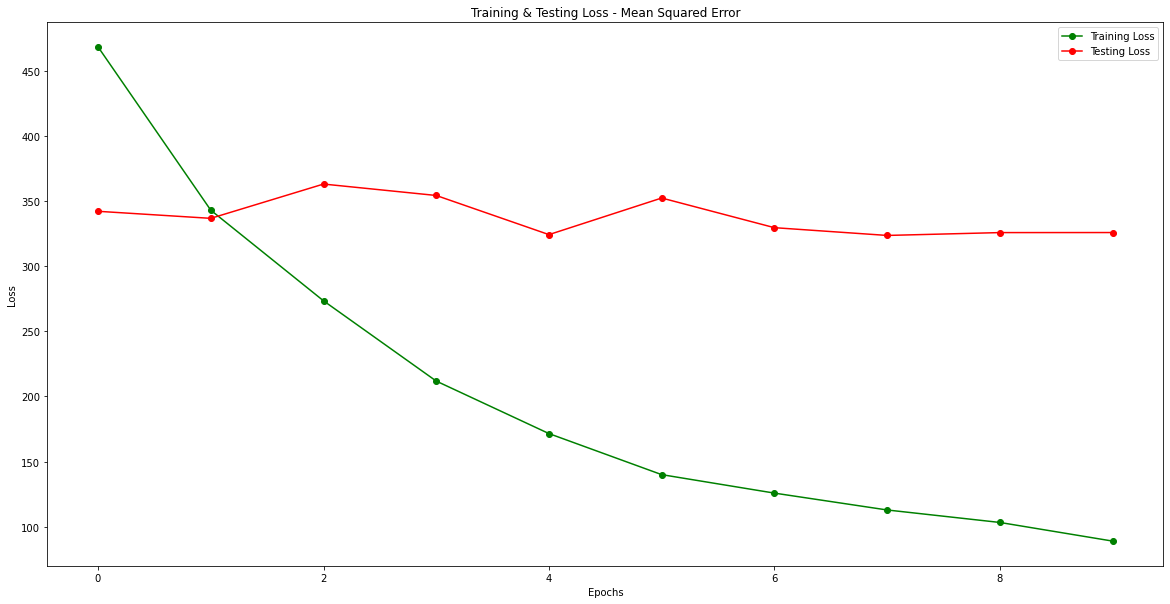

In [5]:
train_loss = history_cb['loss']
val_loss = history_cb['val_loss']
fig , ax = plt.subplots(1,1)
fig.set_size_inches(20,10)


ax.plot(epochsnum , train_loss , 'go-' , label = 'Training Loss')
ax.plot(epochsnum , val_loss , 'ro-' , label = 'Testing Loss')
ax.set_title('Training & Testing Loss - Mean Squared Error')
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
plt.show()

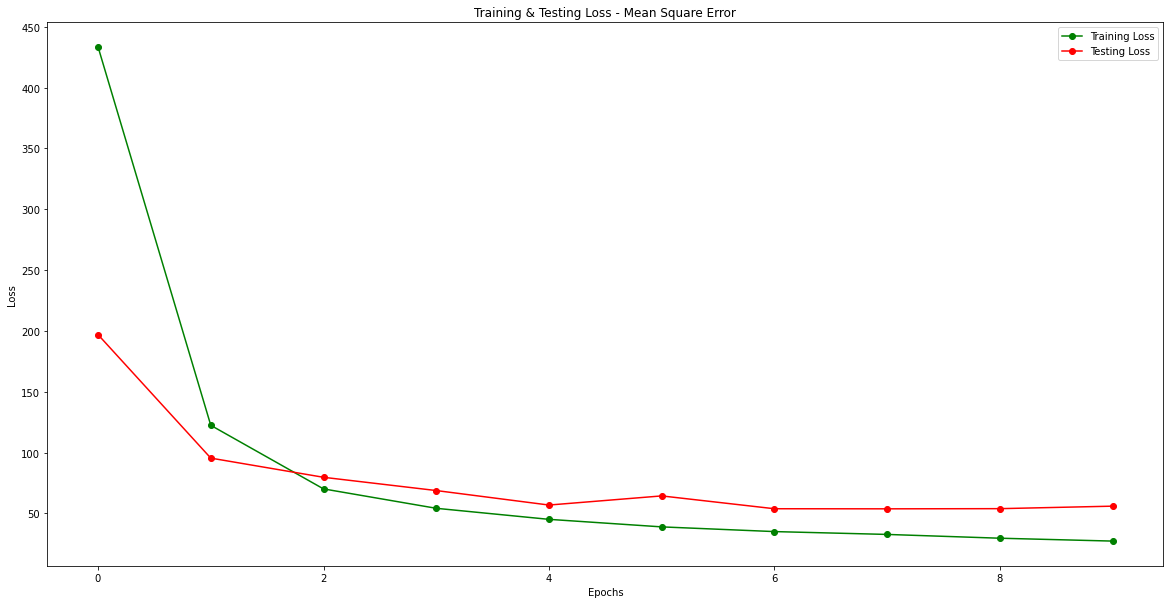

In [7]:
train_loss = history_ci['loss']
val_loss = history_ci['val_loss']

fig , ax = plt.subplots(1,1)
fig.set_size_inches(20,10)

ax.plot(epochsnum , train_loss , 'go-' , label = 'Training Loss')
ax.plot(epochsnum , val_loss , 'ro-' , label = 'Testing Loss')
ax.set_title('Training & Testing Loss - Mean Square Error')
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
plt.show()

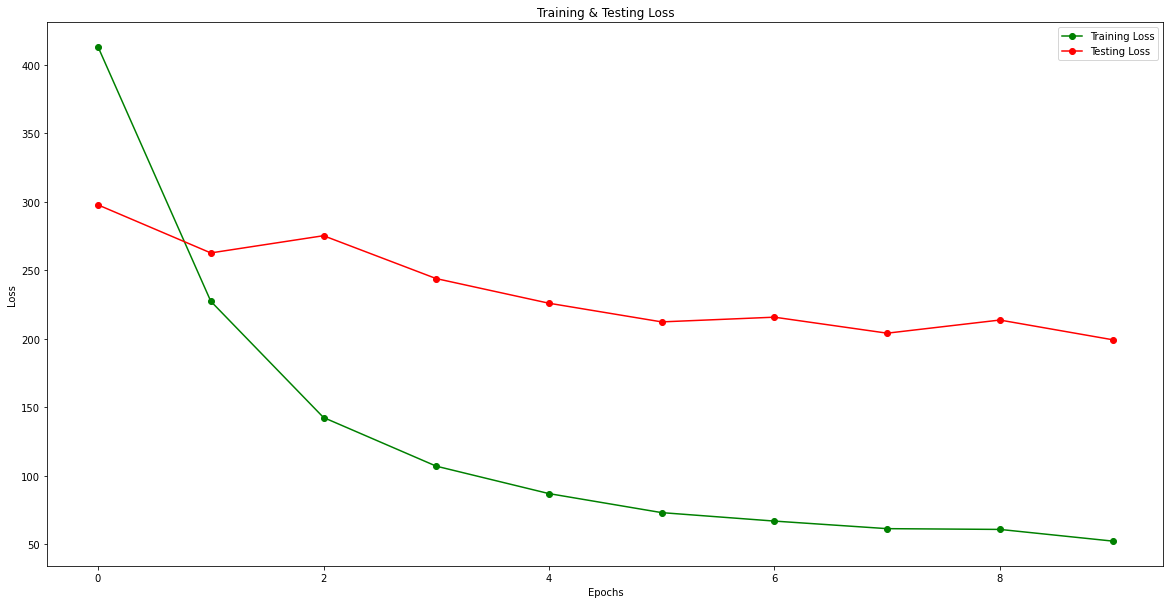

In [11]:
train_loss = history_lb['loss']
val_loss = history_lb['val_loss']

fig , ax = plt.subplots(1,1)
fig.set_size_inches(20,10)

ax.plot(epochsnum , train_loss , 'go-' , label = 'Training Loss')
ax.plot(epochsnum , val_loss , 'ro-' , label = 'Testing Loss')
ax.set_title('Training & Testing Loss')
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
plt.show()

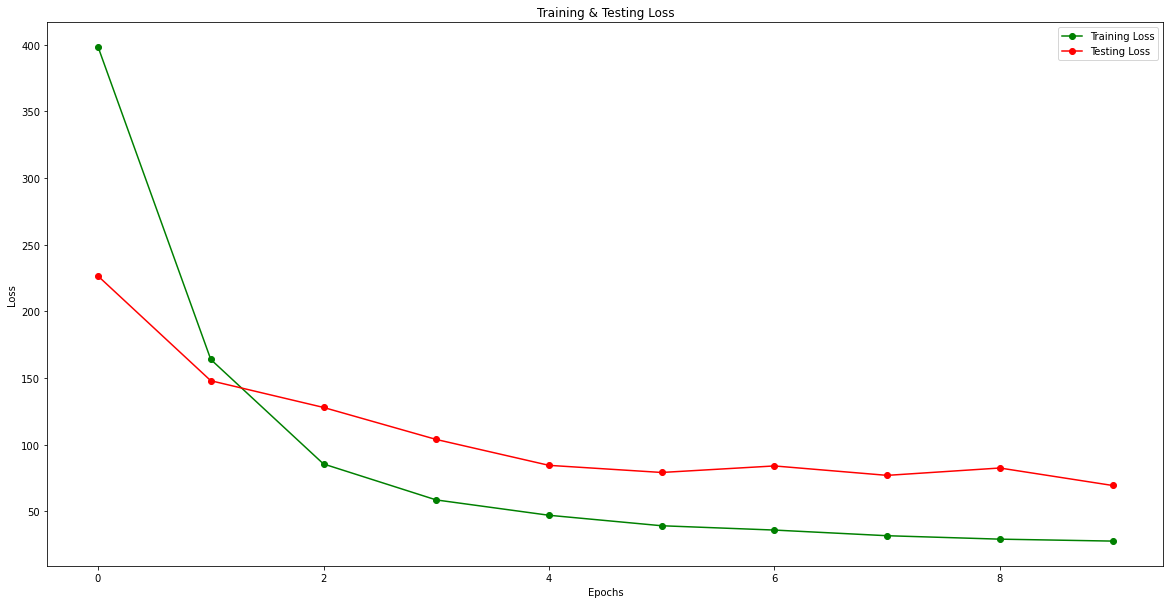

In [95]:
train_loss = history_li['loss']
val_loss = history_li['val_loss']

fig , ax = plt.subplots(1,1)
fig.set_size_inches(20,10)

ax.plot(epochsnum , train_loss , 'go-' , label = 'Training Loss')
ax.plot(epochsnum , val_loss , 'ro-' , label = 'Testing Loss')
ax.set_title('Training & Testing Loss')
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
plt.show()

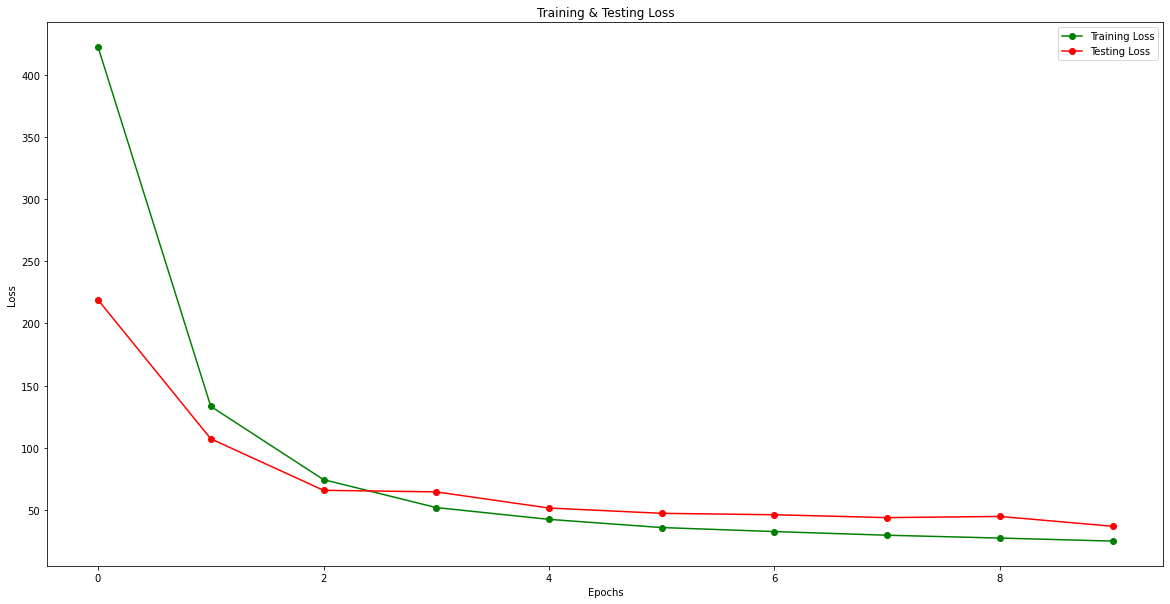

In [45]:
train_loss = history_o['loss']
val_loss = history_o['val_loss']

fig , ax = plt.subplots(1,1)
fig.set_size_inches(20,10)

ax.plot(epochsnum , train_loss , 'go-' , label = 'Training Loss')
ax.plot(epochsnum , val_loss , 'ro-' , label = 'Testing Loss')
ax.set_title('Training & Testing Loss')
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
plt.show()

# Image Visualisation


In [2]:
model_output_dir = '../angle_prediction/new'

In [3]:
df_ci=pd.read_csv('../angle_prediction/csv_data/test/df_ci_v2.csv')
df_cb=pd.read_csv('../angle_prediction/csv_data/test/df_cb_v2.csv')
df_li=pd.read_csv('../angle_prediction/csv_data/test/df_li_v2.csv')
df_lb=pd.read_csv('../angle_prediction/csv_data/test/df_lb_v2.csv')
df_o =pd.read_csv('../angle_prediction/csv_data/test/df_o_v2.csv')

In [4]:
#wtih gpu
def my_imread(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def img_preprocess(image):
    height, _, _ = image.shape
    image = image[int(height/2):,:,:]  # remove top 0.5 of the image, as it is not relavant for lane following
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)  # Nvidia model said it is best to use YUV color space
    image = cv2.GaussianBlur(image, (3,3), 0)
    image = cv2.resize(image, (200,66)) # input image size (200,66) Nvidia model
    image = image / 255 # normalizing
    return image

In [5]:
def image_gen_vis(image_paths, steering_angles, batch_size,rand):
    while True:
        batch_images = []
        batch_steering_angles = []
        
        for i in range(batch_size):
            random.seed(34)
            if isinstance(rand, str):
                random_index = random.randint(0, len(image_paths) - 1)
            else:
                random_index = rand
            image_path = image_paths[random_index]
            image = my_imread(image_paths[random_index])
            steering_angle = steering_angles[random_index]
             
            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)
            
        yield( np.asarray(batch_images), np.asarray(batch_steering_angles))
            
            

### Preprocessing and getting chosen path of corresponding model

In [6]:
def get_mask_path(lo_angle,up_angle,idx):
    #idx: the index of image i.e. the ith image, likely 0
    idx=int(idx)
    df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
    df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
    df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
    df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
    df_test_o = df_o[df_o['Angle']>=lo_angle][df_o['Angle']<=up_angle].reset_index()
    if idx==0:
        testx_ci,testx_cb,testx_li,testx_lb,testx_o = df_test_ci['Imagepath'][idx],df_test_cb['Imagepath'][idx],df_test_li['Imagepath'][idx],df_test_lb['Imagepath'][idx]
        testy_ci,testy_cb,testy_li,testy_lb,testy_o = df_test_ci['Angle'][idx],df_test_cb['Angle'][idx],df_test_li['Angle'][idx],df_test_lb['Angle'][idx]

    else:
        testx_ci,testx_cb,testx_li,testx_lb,testx_o = list(df_test_ci['Imagepath'])[idx],list(df_test_cb['Imagepath'])[idx],list(df_test_li['Imagepath'])[idx],list(df_test_lb['Imagepath'])[idx]
        testy_ci,testy_cb,testy_li,testy_lb,testy_o = list(df_test_ci['Angle'])[idx],list(df_test_cb['Angle'])[idx],list(df_test_li['Angle'])[idx],list(df_test_lb['Angle'])[idx]
    return testx_ci,testx_cb,testx_li,testx_lb,testx_o, testy_ci,testy_cb,testy_li,testy_lb,testy_o

In [7]:
def get_path_list(lo_angle,up_angle):
    df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
    df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
    df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
    df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
    df_test_o = df_o[df_o['Angle']>=lo_angle][df_o['Angle']<=up_angle].reset_index()
    testx_ci,testx_cb,testx_li,testx_lb,testx_o = list(df_test_ci['Imagepath']),list(df_test_cb['Imagepath']),list(df_test_li['Imagepath']),list(df_test_lb['Imagepath']),list(df_test_o['Imagepath'])
    testy_ci,testy_cb,testy_li,testy_lb,testy_o = list(df_test_ci['Angle']),list(df_test_cb['Angle']),list(df_test_li['Angle']),list(df_test_lb['Angle']),list(df_test_o['Angle'])
    return testx_ci,testx_cb,testx_li,testx_lb,testx_o, testy_ci,testy_cb,testy_li,testy_lb,testy_o 

### Mean Square Error as metrics to compare model

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

def summarize(Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
   
    print(f'mse = {mse:.2}')
    print(Y_pred)
    
def predict_analysis(X, Y, method):
    model = load_model(f'{model_output_dir}/lane_navigation_final_'+method+'.h5')
    Y_pred = model.predict(X)
    summarize(Y, Y_pred)
    return Y_pred

/tmp/.tyh002/ipykernel_9658/2683138522.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_o = df_o[df_o['Angle']>=lo_angle][df_

mse = 2.9e+01
[[78.63357]
 [78.63357]
 [78.63357]
 [78.63357]
 [78.63357]
 [78.63357]
 [78.63357]
 [78.63357]
 [78.63357]
 [78.63357]]
mse = 4.7e+01
[[77.12183]
 [77.12183]
 [77.12183]
 [77.12183]
 [77.12183]
 [77.12183]
 [77.12183]
 [77.12183]
 [77.12183]
 [77.12183]]
mse = 0.15
[[83.61184]
 [83.61184]
 [83.61184]
 [83.61184]
 [83.61184]
 [83.61184]
 [83.61184]
 [83.61184]
 [83.61184]
 [83.61184]]
mse = 2e+01
[[88.432594]
 [88.432594]
 [88.432594]
 [88.432594]
 [88.432594]
 [88.432594]
 [88.432594]
 [88.432594]
 [88.432594]
 [88.432594]]
mse = 6.9e+01
[[92.30101]
 [92.30101]
 [92.30101]
 [92.30101]
 [92.30101]
 [92.30101]
 [92.30101]
 [92.30101]
 [92.30101]
 [92.30101]]


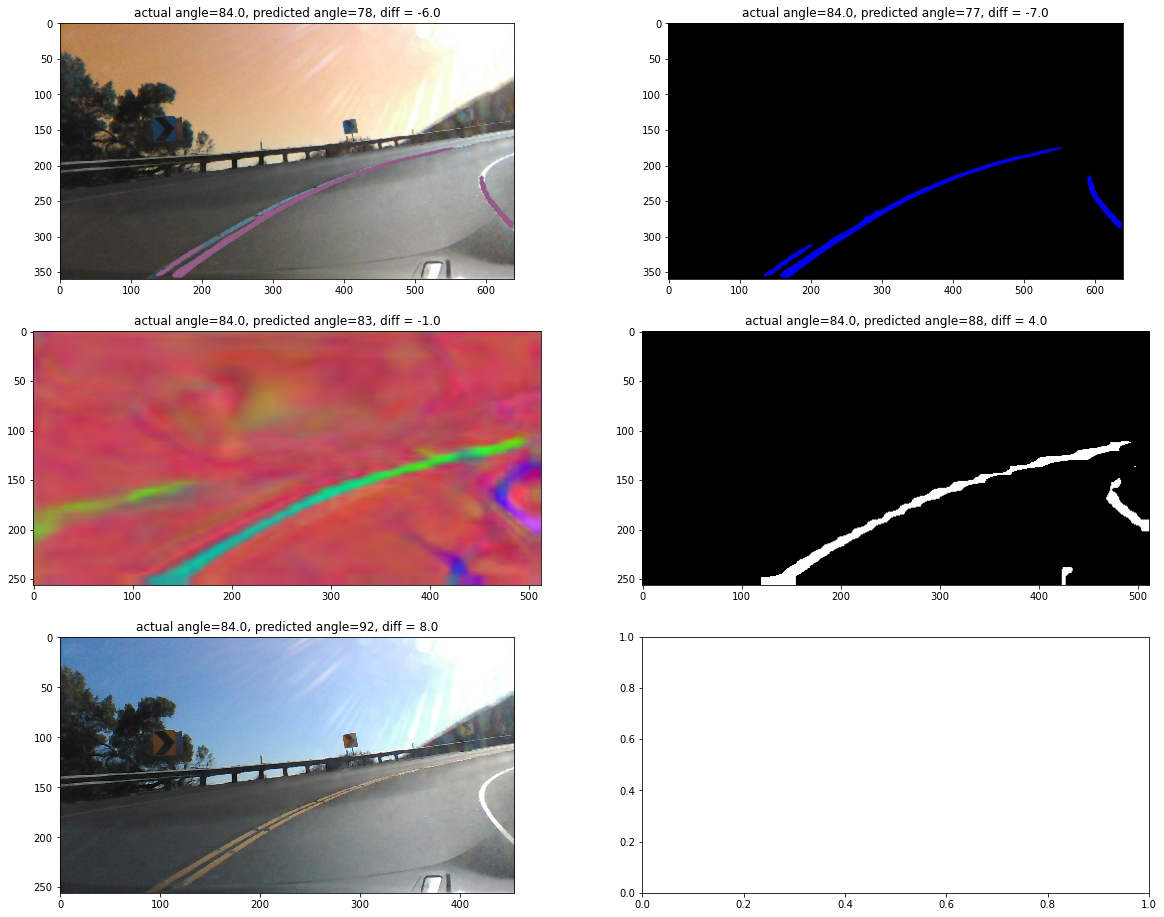

In [27]:
lo_angle = 84
up_angle = 86
idx = 7
testx_ci,testx_cb,testx_li,testx_lb,testx_o, testy_ci,testy_cb,testy_li,testy_lb,testy_o = get_path_list(lo_angle,up_angle)

fig, axes = plt.subplots(3, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb,testx_o],[testy_ci,testy_cb,testy_li,testy_lb,testy_o]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'
    elif i==4:
        x,y,m=1,1,'o'

    X_test, y_test = next(image_gen_vis(testx,testy, 10,idx))
    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred = predict_analysis(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(testx[idx]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[0]}, predicted angle={int(y_pred[0])}, diff = {int(y_pred[0])-y_test[0]}")
    i+=1


# Extreme angle


/tmp/.tyh002/ipykernel_9658/2683138522.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_o = df_o[df_o['Angle']>=lo_angle][df_

mse = 7e+02
[[-256.56726]
 [-256.56726]
 [-256.56726]
 [-256.56726]
 [-256.56726]
 [-256.56726]
 [-256.56726]
 [-256.56726]
 [-256.56726]
 [-256.56726]]
mse = 9e+01
[[-273.5056]
 [-273.5056]
 [-273.5056]
 [-273.5056]
 [-273.5056]
 [-273.5056]
 [-273.5056]
 [-273.5056]
 [-273.5056]
 [-273.5056]]
mse = 2.3e+02
[[-267.88226]
 [-267.88226]
 [-267.88226]
 [-267.88226]
 [-267.88226]
 [-267.88226]
 [-267.88226]
 [-267.88226]
 [-267.88226]
 [-267.88226]]
mse = 1e+03
[[-315.28174]
 [-315.28174]
 [-315.28174]
 [-315.28174]
 [-315.28174]
 [-315.28174]
 [-315.28174]
 [-315.28174]
 [-315.28174]
 [-315.28174]]
mse = 2.8e+02
[[-299.76947]
 [-299.76947]
 [-299.76947]
 [-299.76947]
 [-299.76947]
 [-299.76947]
 [-299.76947]
 [-299.76947]
 [-299.76947]
 [-299.76947]]


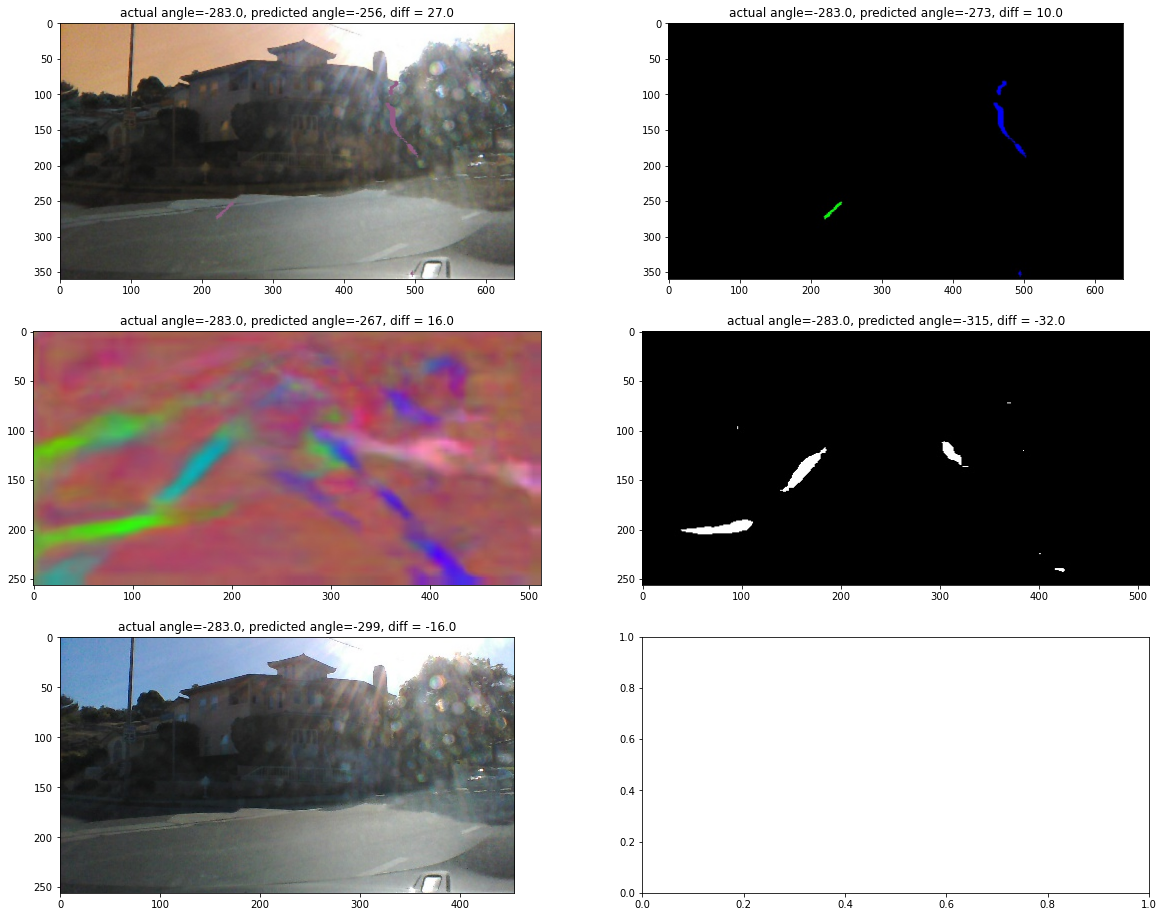

In [28]:
lo_angle = -290
up_angle = -280
idx = 3
testx_ci,testx_cb,testx_li,testx_lb,testx_o, testy_ci,testy_cb,testy_li,testy_lb,testy_o = get_path_list(lo_angle,up_angle)

fig, axes = plt.subplots(3, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb,testx_o],[testy_ci,testy_cb,testy_li,testy_lb,testy_o]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'
    elif i==4:
        x,y,m=1,1,'o'

    X_test, y_test = next(image_gen_vis(testx,testy, 10,idx))
    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred = predict_analysis(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(testx[idx]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[0]}, predicted angle={int(y_pred[0])}, diff = {int(y_pred[0])-y_test[0]}")
    i+=1


/tmp/.tyh002/ipykernel_9658/2683138522.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_9658/2683138522.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_o = df_o[df_o['Angle']>=lo_angle][df_

mse = 5.7e+01
[[223.36488]
 [223.36488]
 [223.36488]
 [223.36488]
 [223.36488]
 [223.36488]
 [223.36488]
 [223.36488]
 [223.36488]
 [223.36488]]
mse = 6.3e+04
[[-34.310432]
 [-34.310432]
 [-34.310432]
 [-34.310432]
 [-34.310432]
 [-34.310432]
 [-34.310432]
 [-34.310432]
 [-34.310432]
 [-34.310432]]
mse = 1.7e+02
[[202.90239]
 [202.90239]
 [202.90239]
 [202.90239]
 [202.90239]
 [202.90239]
 [202.90239]
 [202.90239]
 [202.90239]
 [202.90239]]
mse = 8.5e+03
[[123.53118]
 [123.53118]
 [123.53118]
 [123.53118]
 [123.53118]
 [123.53118]
 [123.53118]
 [123.53118]
 [123.53118]
 [123.53118]]
mse = 2.6e+02
[[199.61139]
 [199.61139]
 [199.61139]
 [199.61139]
 [199.61139]
 [199.61139]
 [199.61139]
 [199.61139]
 [199.61139]
 [199.61139]]


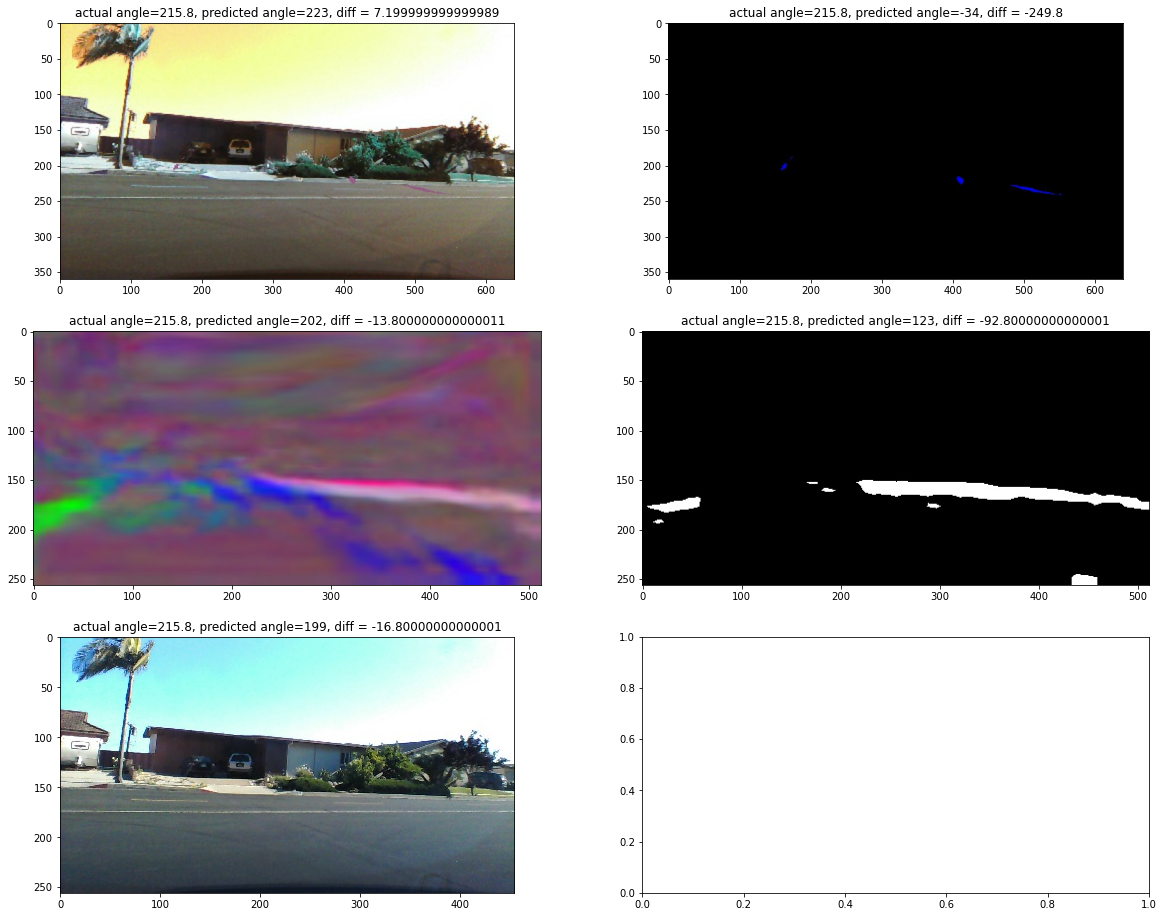

In [29]:
lo_angle = 200
up_angle = 220
idx = 3
testx_ci,testx_cb,testx_li,testx_lb,testx_o, testy_ci,testy_cb,testy_li,testy_lb,testy_o = get_path_list(lo_angle,up_angle)

fig, axes = plt.subplots(3, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb,testx_o],[testy_ci,testy_cb,testy_li,testy_lb,testy_o]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'
    elif i==4:
        x,y,m=1,1,'o'

    X_test, y_test = next(image_gen_vis(testx,testy, 10,idx))
    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred = predict_analysis(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(testx[idx]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[0]}, predicted angle={int(y_pred[0])}, diff = {int(y_pred[0])-y_test[0]}")
    i+=1


## Angle visulisation

/tmp/.tyh002/ipykernel_17080/154105965.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_17080/154105965.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_17080/154105965.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_17080/154105965.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()


mse = 1.1e+02
[39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33]
mse = 1.7e+02
[39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33
 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.33 39.

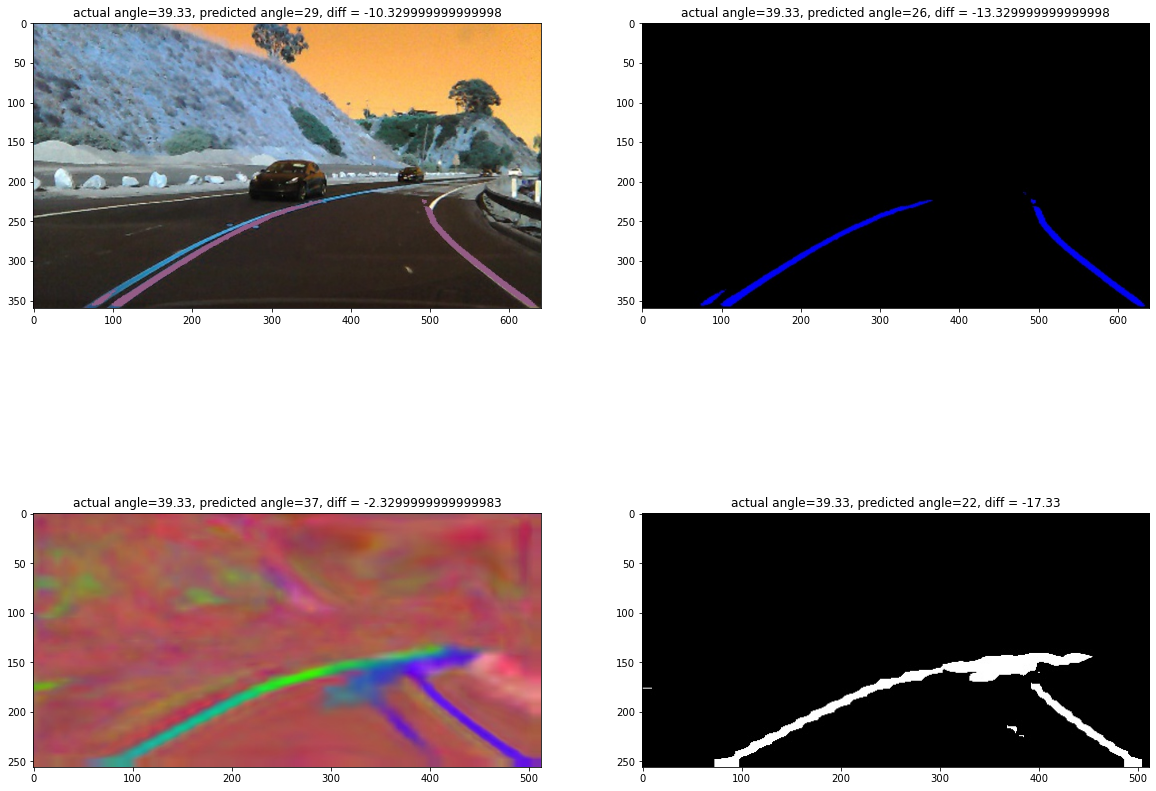

In [43]:
lo_angle = 35
up_angle = 40
idx = 2
testx_ci,testx_cb,testx_li,testx_lb, testy_ci,testy_cb,testy_li,testy_lb = get_path_list(lo_angle,up_angle)

fig, axes = plt.subplots(2, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb],[testy_ci,testy_cb,testy_li,testy_lb]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'

    X_test, y_test = next(image_gen_vis(testx,testy, 100,idx))
    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred = predict_analysis(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(testx[idx]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[0]}, predicted angle={int(y_pred[0])}, diff = {int(y_pred[0])-y_test[0]}")
    i+=1
